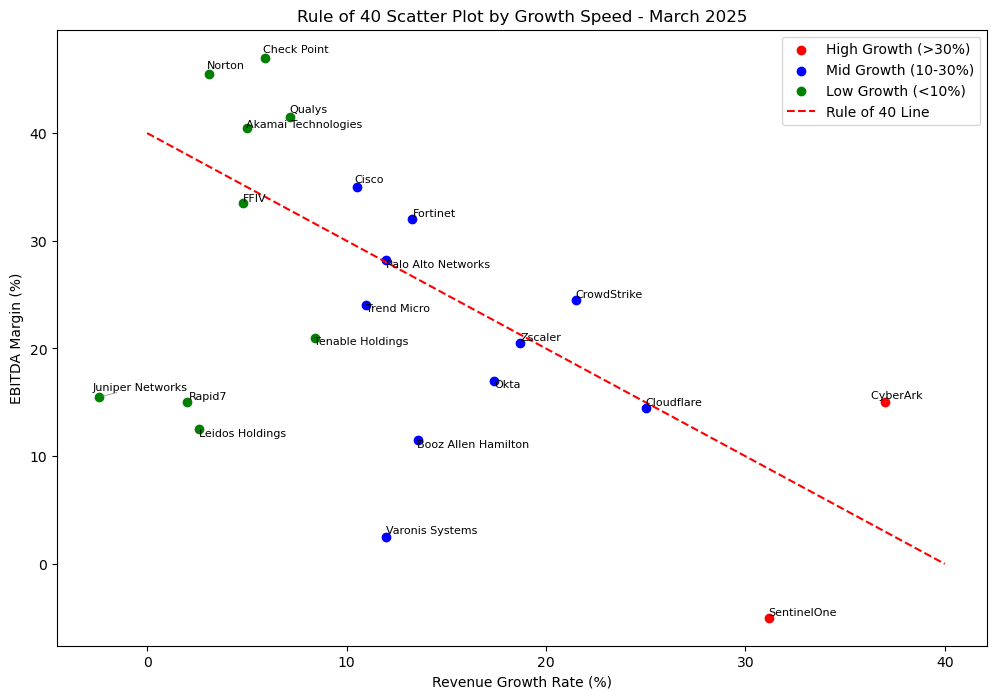

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Extract Data from Excel
file_path = 'E:\downloads\NotBreakingUp\Software\Rule of 40.xlsx'
df = pd.read_excel(file_path, sheet_name='Rule of 40') 

# Extract Data 
companies = df['Company Name'].tolist()
growth = df['Revenue Growth Rate (%)'].tolist()
profit = df['EBITDA Margin (%)'].tolist()

# Classify according to growth
high_growth_x = [g for g, p in zip(growth, profit) if g > 30]
high_growth_y = [p for g, p in zip(growth, profit) if g > 30]
mid_growth_x = [g for g, p in zip(growth, profit) if 10 <= g <= 30]
mid_growth_y = [p for g, p in zip(growth, profit) if 10 <= g <= 30]
low_growth_x = [g for g, p in zip(growth, profit) if g < 10]
low_growth_y = [p for g, p in zip(growth, profit) if g < 10]

plt.figure(figsize=(12, 8))

# Making Scatter Plot
plt.scatter(high_growth_x, high_growth_y, color='red', label='High Growth (>30%)')
plt.scatter(mid_growth_x, mid_growth_y, color='blue', label='Mid Growth (10-30%)')
plt.scatter(low_growth_x, low_growth_y, color='green', label='Low Growth (<10%)')

texts = []
for i, company in enumerate(companies):
    texts.append(plt.text(growth[i], profit[i], company, fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Rule of 40
plt.plot([0, 40], [40, 0], 'r--', label='Rule of 40 Line')

plt.xlabel('Revenue Growth Rate (%)')
plt.ylabel('EBITDA Margin (%)')

plt.title('Rule of 40 Scatter Plot by Growth Speed - March 2025')
plt.legend()
plt.show()